In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os
import inception
import prettytensor as pt

In [2]:
tf.__version__

'1.1.0'

In [3]:
pt.__version__

'0.7.4'

In [4]:
import knifey

In [5]:
from knifey import num_classes

In [6]:
knifey.data_dir = "C:/Users/Aman Deep Singh/Documents/Python/Data/Knifey/data/knifey-spoony/"

In [7]:
data_dir = knifey.data_dir

In [8]:
knifey.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [9]:
dataset = knifey.load()

Creating dataset from the files in: C:/Users/Aman Deep Singh/Documents/Python/Data/Knifey/data/knifey-spoony/
- Data saved to cache-file: C:/Users/Aman Deep Singh/Documents/Python/Data/Knifey/data/knifey-spoony/knifey-spoony.pkl


In [10]:
# The code to load own image files
# from dataset import load_cached
# dataset = load_cached(cache_path='my_dataset_cache.pkl', in_dir='my_images/')
# num_classes = dataset.num_classes

In [11]:
class_names = dataset.class_names
class_names

['forky', 'knifey', 'spoony']

In [12]:
image_paths_train, cls_train, labels_train = dataset.get_training_set()

In [13]:
image_paths_train[0]

'C:\\Users\\Aman Deep Singh\\Documents\\Python\\Data\\Knifey\\data\\knifey-spoony\\forky\\forky-01-0001.jpg'

In [14]:
image_paths_test, cls_test, labels_test = dataset.get_test_set()

In [16]:
image_paths_test[0]

'C:\\Users\\Aman Deep Singh\\Documents\\Python\\Data\\Knifey\\data\\knifey-spoony\\forky\\test/forky-test-01-0001.jpg'

In [17]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(image_paths_train)))
print("- Test-set:\t\t{}".format(len(image_paths_test)))

Size of:
- Training-set:		4170
- Test-set:		530


In [18]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [19]:
# Helper function for loading images
from matplotlib.image import imread

def load_images(image_paths):
    images = [imread(path) for path in image_paths]
    return np.asarray(images)

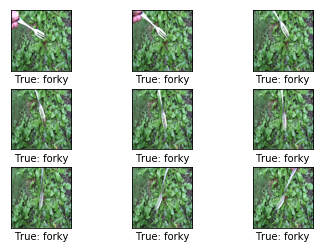

In [20]:
images = load_images(image_paths=image_paths_test[0:9])
cls_true = cls_test[0:9]
plot_images(images=images, cls_true=cls_true, smooth=True)

In [21]:
inception.data_dir = 'C:/Users/Aman Deep Singh/Documents/Python/Data/Inception v3/inception/'

In [22]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [23]:
model = inception.Inception()

In [24]:
# Calculate transfer values
from inception import transfer_values_cache

In [25]:
file_path_cache_train = os.path.join(data_dir, 'inception-knifey-train.pkl')
file_path_cache_test = os.path.join(data_dir, 'inception-knifey-test.pkl')

In [26]:
print("Processing Inception transfer-values for training-images ...")
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              image_paths=image_paths_train,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Processing image:   4170 / 4170
- Data saved to cache-file: C:/Users/Aman Deep Singh/Documents/Python/Data/Knifey/data/knifey-spoony/inception-knifey-train.pkl


In [27]:
print("Processing Inception transfer-values fro testing-images ...")
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             image_paths=image_paths_test,
                                             model=model)

Processing Inception transfer-values fro testing-images ...
- Processing image:    530 / 530
- Data saved to cache-file: C:/Users/Aman Deep Singh/Documents/Python/Data/Knifey/data/knifey-spoony/inception-knifey-test.pkl


In [28]:
transfer_values_train.shape

(4170, 2048)

In [29]:
transfer_values_test.shape

(530, 2048)

In [31]:
def plot_transfer_values(i):
    print('Input image: ')
    image = imread(image_paths_test[i])
    plt.imshow(image, interpolation='spline16')
    plt.show()
    
    print('Transfer values for the image using Inception model')
    
    img = transfer_values_test[i]
    img = img.reshape((32, 64))
    
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

Input image: 


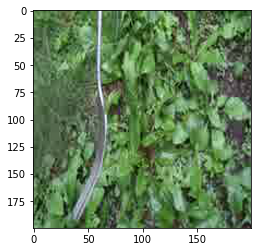

Transfer values for the image using Inception model


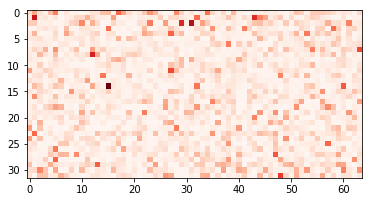

In [32]:
plot_transfer_values(100)

Input image: 


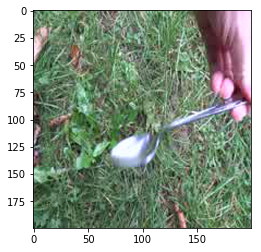

Transfer values for the image using Inception model


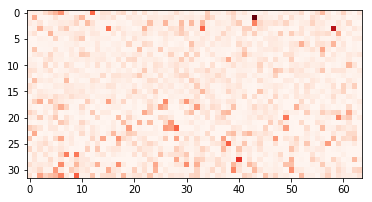

In [33]:
plot_transfer_values(300)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
transfer_values = transfer_values_train

In [37]:
cls = cls_train

In [38]:
transfer_values.shape

(4170, 2048)

In [39]:
transfer_values_reduced = pca.fit_transform(transfer_values)

In [40]:
transfer_values_reduced.shape

(4170, 2)

In [41]:
def plot_scatter(values, cls):
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, num_classes))
    idx = np.random.permutation(len(values))
    colors = cmap[cls[idx]]
    x = values[idx, 0]
    y = values[idx, 1]
    plt.scatter(x, y, color=colors, alpha=0.5)
    plt.show()

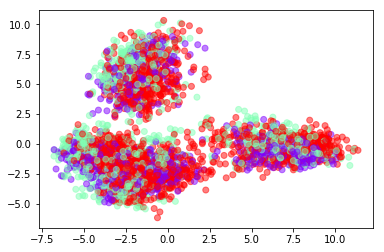

In [42]:
plot_scatter(transfer_values_reduced, cls=cls)

In [43]:
# Analysis of transfervalues using t-SNE
from sklearn.manifold import TSNE

In [44]:
pca = PCA(n_components=50)
transfer_values_50d = pca.fit_transform(transfer_values)

In [45]:
tsne = TSNE(n_components=2)

In [46]:
transfer_values_reduced = tsne.fit_transform(transfer_values_50d)

In [47]:
transfer_values_reduced.shape

(4170, 2)

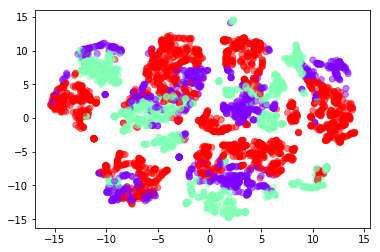

In [48]:
plot_scatter(transfer_values_reduced, cls=cls)

In [50]:
# New Classifier in Tensorflow
transfer_len = model.transfer_len
x = tf.placeholder(tf.float32, shape=[None, transfer_len], name='x')
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [51]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [52]:
# Defining the neural network
x_pretty = pt.wrap(x)

with pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.fully_connected(size=1024, name='layer_fc1').softmax_classifier(num_classes=num_classes, labels=y_true)

In [53]:
# Optimization method
global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)

In [54]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss, global_step)

In [55]:
y_pred_cls = tf.argmax(y_pred, dimension=1)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [56]:
# TensorFlow Run
session = tf.Session()

In [57]:
session.run(tf.global_variables_initializer())

In [ ]:
train_batch_size = 64
def random_batch():
    num_images = len(transfer_values_train)
    idx = np.random.choice(num_images, size=train_batch_size, replace=False)